<center>
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"

## Индивидуальный проект: анализ профиля банковских клиентов, привлеченных с помощью телемаркетинга.
### Лукина Полина
#### Часть 1

## <font color='green'>Review. Часть 1</font>

-       описание набора данных и признаков (на понятном русском, желательно с картинками) - 1 балл

<font color='green'>1 балл. 
</font>

-       первичный анализ признаков  - 3 балла

<font color='green'>3 балла. <br> <br>
</font>

-       первичный визуальный анализ признаков  - 3 балла

<font color='green'>2,5 балла. <br> 
Есть ли в данных выбросы? Как они влияют на результат? 

</font>

-       если пришли к каким-то "инсайтам", обнаружили закономерности - изложите  - 3 балла

<font color='green'>2 балла <br> 
Инсайтов обнаружено не было, сильных зависимостей тоже. Надеюсь, они проявятся во второй части.
</font>

## <font color='green'>Итого: 9 баллов (округл.)</font>

## Описание переменных ## 

** Банковские данные клиента** 

- age| Возраст | интервальная
- job | Тип работы| категориальная| 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'
- marital | Маритальный статус| категориальная|  'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed
- education| Уровень образования| категориальная| basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'
- default| Кредит по умолчанию| категориальная|  'no','yes','unknown'
- housing| Жилищный кредит| категориальная| categorical: 'no','yes','unknown'
- loan| Потребительский кредит| категориальная|  'no','yes','unknown'

** Данные последнего контакта по промо-компании **

- contact| Тип контакта| категориальная|  'cellular','telephone'
- month| Месяц| категориальная| jan', 'feb', 'mar', ..., 'nov', 'dec'
- day_of_week| День недели| категориальная| mon','tue','wed','thu','fri'
- duration| Продолжительность, сек| интервальная

**Другие атрибуты **

- campaign| Количество контактов в течение компании| интервальная
- pdays| Количество дней, прошедших с тех пор как с клиентом контактировали в рамках другой промо-компании| интервальная| 999 - никогда не контактировали с клиентом ранее
- previous| Количество контактов с клиентом до компании| интервальная
- poutcome| Результат прошлой компании для клиента| категориальная| failure','nonexistent','success'

** Атрибуты социального и экономического контекста **

- emp.var.rate|Уровен изменения занятости|интервальная
- cons.price.idx| Индекс потребительских цен| интервальная
- cons.conf.idx| Индекс потребительской уверенности| интервальная
- euribor3m| Европейская межбанковская ставка предложения (3 месяца)| интервальная
- nr.employed| Количество занятых| интервальная

** Целевая переменная**

- y | Оформил ли клиент подписку на временный депозит| дихотомическая| yes','no'

**Задача анализа**

На основе имеющихся атрибутов мы попытаемся спронозировать, купит ли клиент подписку. В качестве финального результата мы рассчитываем получить профиль клиентов, которые с высокой долей вероятности подпишутся на банковский продукт в результате телефонной промо-компании.

In [2]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append('C:/Users/pollu/OneDrive/Документы/HSE_BigML_AddProfEduc/--- scripts/scripts') 
from yandex_mipt_stat_tests import *
from scipy.stats import ttest_ind

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("C:/Users/pollu/OneDrive/Документы/HSE_BigML_AddProfEduc/project/bank-additional_2.csv", sep = ";") 

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [50]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdaysnew
count,4119.000000,4119,4119,4119,4119,4119,4119,4119,4119,4119,...,4119.000000,4119.000000,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119,4119.000000
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no,NaN
freq,NaN,1012,2509,1264,3315,2175,3349,2652,1378,860,...,NaN,NaN,3523,NaN,NaN,NaN,NaN,NaN,3668,NaN
mean,40.113620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,960.422190,0.190337,NaN,0.084972,93.579704,-40.499102,3.621356,5166.481695,NaN,0.038844
std,10.313362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,191.922786,0.541788,NaN,1.563114,0.579349,4.594578,1.733591,73.667904,NaN,0.193247
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN,0.000000
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN,0.000000
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN,0.000000
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN,0.000000


** Количество наблюдений** 4119

In [12]:
## Проанализируем описательные статистики интервальных переменных##
## Данные клиента##
print ("Возраст \n\t",
      df["age"].describe())
## Данные контакта##
## Здесь отсортируем только состоявшиеся контакты##
print ("Продолжительность последнего контакта \n\t",
      df[df["duration"]>0]["duration"].describe())
## Другие данные##
## Здесь отсортируем только тех, с кем ранее был промо-контакт##
print ("Количество дней с последнего промо-контакта \n\t",
      df[df["pdays"]<999]["pdays"].describe())
print ("Количество предыдущих контактов \n\t",
       df["previous"].describe())
print ("Количество предыдущих контактов по компании \n\t",
       df["campaign"].describe())
##Общеэкономические показатели на момент контакта##
print ("Уровен изменения занятости \n\t",
       df["emp.var.rate"].describe())
print ("Индекс потребительских цен\n\t",
       df["cons.price.idx"].describe())
print ("Индекс потребительской уверенности \n\t",
       df["cons.conf.idx"].describe())
print ("вропейская межбанковская ставка предложени \n\t",
       df["euribor3m"].describe())
print ("Количество занятых \n\t",
       df["nr.employed"].describe())


Возраст 
	 count    4119.000000
mean       40.113620
std        10.313362
min        18.000000
25%        32.000000
50%        38.000000
75%        47.000000
max        88.000000
Name: age, dtype: float64
Продолжительность последнего контакта 
	 count    4118.000000
mean      256.850413
std       254.703220
min         4.000000
25%       103.000000
50%       181.000000
75%       317.000000
max      3643.000000
Name: duration, dtype: float64
Количество дней с последнего промо-контакта 
	 count    160.000000
mean       5.862500
std        3.911743
min        0.000000
25%        3.000000
50%        6.000000
75%        6.000000
max       21.000000
Name: pdays, dtype: float64
Количество предыдущих контактов 
	 count    4119.000000
mean        0.190337
std         0.541788
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: previous, dtype: float64
Количество предыдущих контактов по компании 
	 count    4119.000000
mean        2.5372

In [78]:
## Проанализируем распеределение категориальных переменных##
## Данные клиента##
print ("\tТип работы\n",
      format(round(100*df["job"].value_counts()/4119,2)))
print ("\n\tМаритальный статус \n",
       format(round(100*df["marital"].value_counts()/4119,2)))
print ("\n\tУровень образования \n",
      format(round(100*df["education"].value_counts()/4119,2)))
## Вид кредитования ##
print ("\n\tКредит по умолчанию \n",
      format(round(100*df["default"].value_counts()/4119,2)))
print ("\n\tЖилищный кредит \n",
      format(round(100*df["housing"].value_counts()/4119,2)))
print ("Потребительский кредит \n",
      format(round(100*df["loan"].value_counts()/4119,2)))
## Данные контакта ##
print ("\n\tТип контакта \n",
       format(round(100*df["contact"].value_counts()/4119,2)))
print ("\n\tМесяц контакта\n",
       format(round(100*df["month"].value_counts()/4119,2)))
print (" \n\tДень недели \n",
      format(round(100*df["day_of_week"].value_counts()/4119,2)))
print (" \n\t Подписка \n",
      format(round(100*df["y"].value_counts()/4119,2)))

	Тип работы
 admin.           24.57
blue-collar      21.46
technician       16.78
services          9.54
management        7.87
retired           4.03
self-employed     3.86
entrepreneur      3.59
unemployed        2.69
housemaid         2.67
student           1.99
unknown           0.95
Name: job, dtype: float64

	Маритальный статус 
 married     60.91
single      27.99
divorced    10.83
unknown      0.27
Name: marital, dtype: float64

	Уровень образования 
 university.degree      30.69
high.school            22.36
basic.9y               13.94
professional.course    12.99
basic.4y               10.42
basic.6y                5.54
unknown                 4.05
illiterate              0.02
Name: education, dtype: float64

	Кредит по умолчанию 
 no         80.48
unknown    19.50
yes         0.02
Name: default, dtype: float64

	Жилищный кредит 
 yes        52.80
no         44.65
unknown     2.55
Name: housing, dtype: float64
Потребительский кредит 
 no         81.31
yes        16.14
unknown

In [133]:
def dich(d):
    if d == 'yes':
        return 1
    elif  == 'no':
        return 0
df['y_new'] = df['y'].apply(dich)

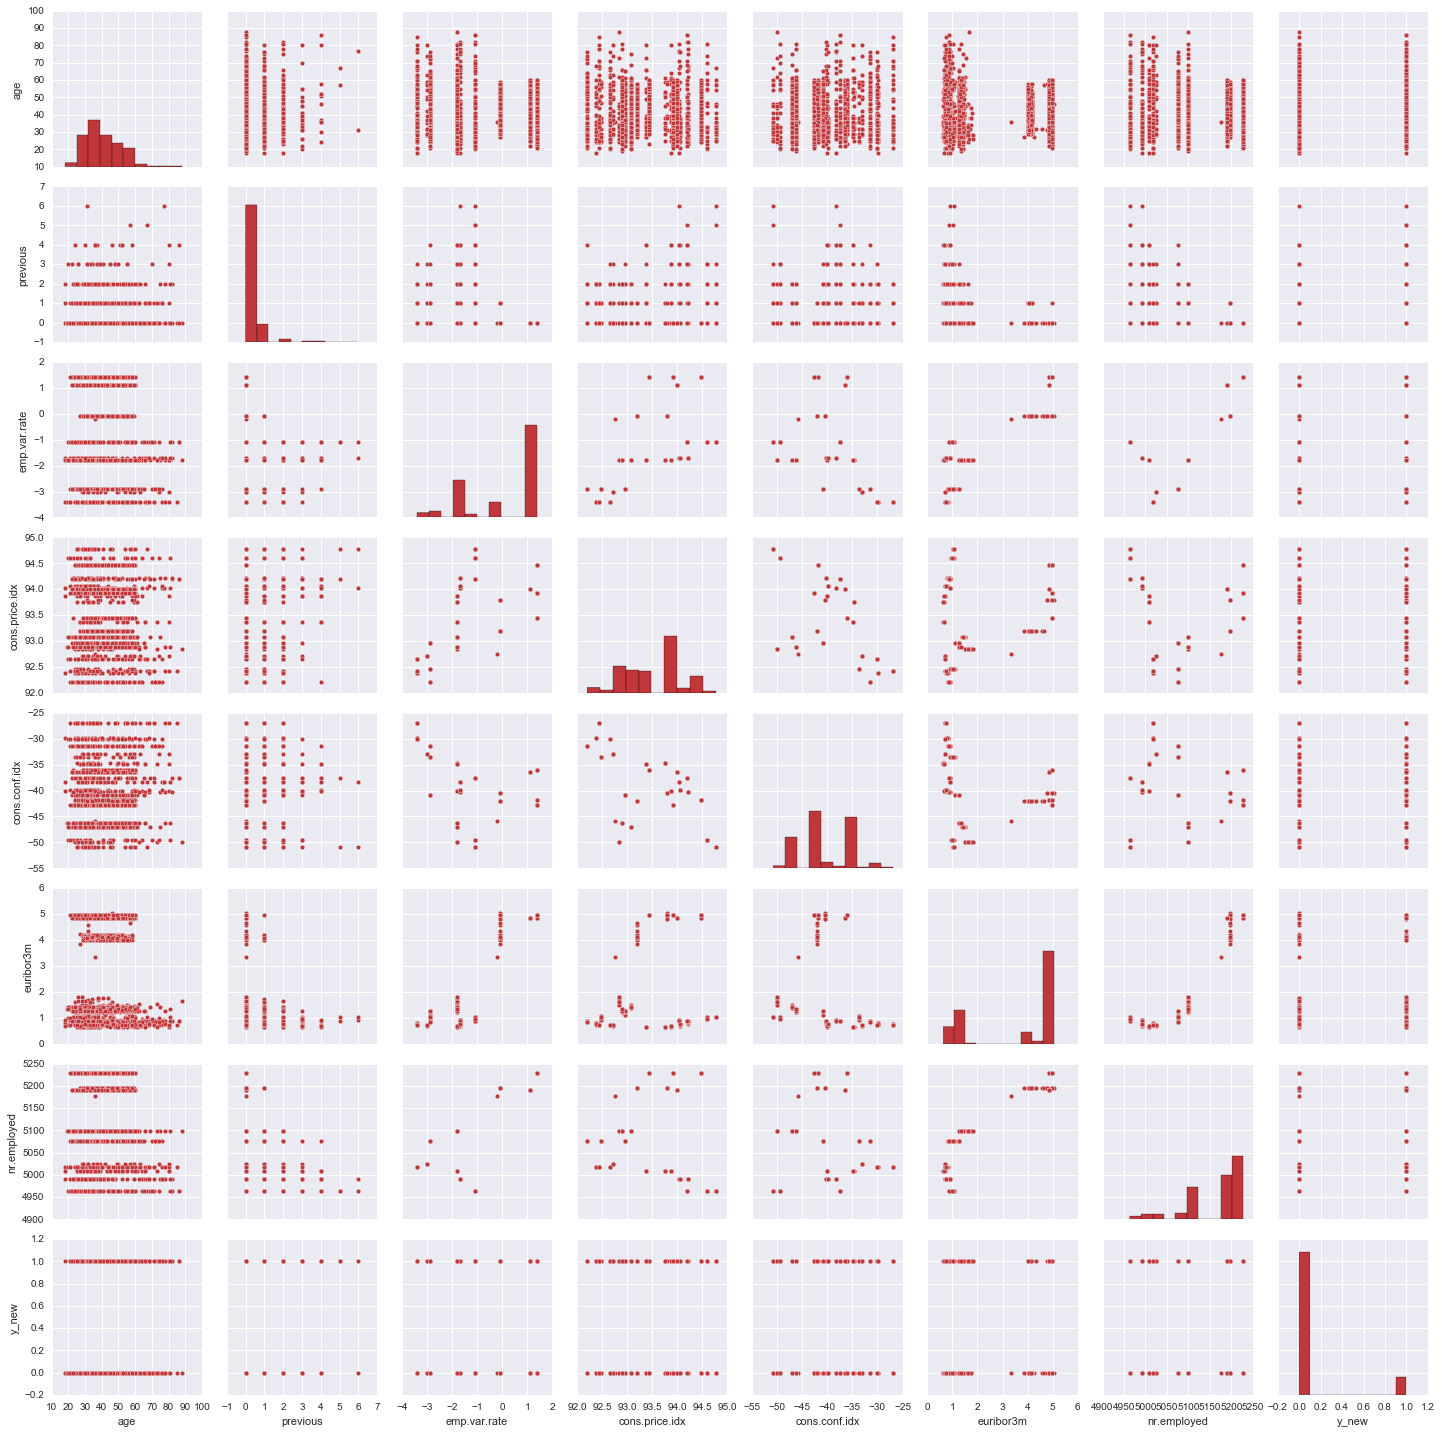

In [176]:
sns.set_palette(sns.color_palette("RdBu"))
sns.pairplot(df[['age','previous', 'emp.var.rate', 'cons.price.idx',"cons.conf.idx",
                       'euribor3m', 'nr.employed',"y_new"]])
##на первый взгляд никаких интересных корреляций между интервальными нет##

In [179]:
##Но при этом все t-тесты подтверждают различия##
print("t-тест для распределения по возрасту.гипотеза о разности распределений подтверждена")
print(ttest_ind(df[df['y_new'] == 1]['age'], 
          df[df['y_new'] == 0]['age'], equal_var=False))
print("t-тест для распределения по кол-ву предыдущих контактов.гипотеза о разности распределений подтверждена")
print(ttest_ind(df[df['y_new'] == 1]['previous'], 
          df[df['y_new'] == 0]['previous'], equal_var=False))
print("t-тест для распределения по продолжительности контактов.гипотеза о разности распределений подтверждена")
print(ttest_ind(df[df['y_new'] == 1]["duration"], 
          df[df['y_new'] == 0]["duration"], equal_var=False))
print("t-тест для распределения по кол-ву дней с последнего промо-контакта.гипотеза о разности распределений подтверждена")
print(ttest_ind(df[df['y_new'] == 1]["pdays"], 
          df[df['y_new'] == 0]["pdays"], equal_var=False))
print("t-тест для распределения по уровню изменения занятости.гипотеза о разности распределений подтверждена")
print(ttest_ind(df[df['y_new'] == 1]["emp.var.rate"], 
          df[df['y_new'] == 0]["emp.var.rate"], equal_var=False))
print("t-тест для распределения по уровню потребительских цен.гипотеза о разности распределений подтверждена")
print(ttest_ind(df[df['y_new'] == 1]["cons.price.idx"], 
          df[df['y_new'] == 0]["cons.price.idx"], equal_var=False))
print("t-тест для распределения по уровню потребительских цен.гипотеза о разности распределений подтверждена")
print(ttest_ind(df[df['y_new'] == 1]["cons.conf.idx"], 
          df[df['y_new'] == 0]["cons.conf.idx"], equal_var=False))
print("t-тест для распределения по Европейской межбанковской ставке предложения.гипотеза о разности распределений подтверждена")
print(ttest_ind(df[df['y_new'] == 1]["euribor3m"], 
          df[df['y_new'] == 0]["euribor3m"], equal_var=False))
print("t-тест для распределения по количеству занятых.гипотеза о разности распределений подтверждена")
print(ttest_ind(df[df['y_new'] == 1]["nr.employed"], 
          df[df['y_new'] == 0]["nr.employed"], equal_var=False))

## К полученным результатам не стоит относиться слишком серьезно, 
## т.к. у нас довольно большая выборка на которой даже маленькие различия кажутся статистичеки значимыми

t-тест для распределения по возрасту.гипотеза о разности распределений подтверждена
Ttest_indResult(statistic=3.0826454519054547, pvalue=0.0021621135232518037)
t-тест для распределения по кол-ву предыдущих контактов.гипотеза о разности распределений подтверждена
Ttest_indResult(statistic=9.2807260523592348, pvalue=6.1752771270233296e-19)
t-тест для распределения по продолжительности контактов.гипотеза о разности распределений подтверждена
Ttest_indResult(statistic=17.370158092803024, pvalue=1.0502210912054762e-52)
t-тест для распределения по кол-ву дней с последнего промо-контакта.гипотеза о разности распределений подтверждена
Ttest_indResult(statistic=-10.428672691331709, pvalue=5.3117414076309738e-23)
t-тест для распределения по уровню изменения занятости.гипотеза о разности распределений подтверждена
Ttest_indResult(statistic=-17.513208212738665, pvalue=8.5180904896577905e-55)
t-тест для распределения по уровню потребительских цен.гипотеза о разности распределений подтверждена
Ttest

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_new,education_new,job_new,duration_new
age,1.000000,0.041299,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936,0.060374,-0.070732,-0.103687,0.001683
duration,0.041299,1.000000,-0.085348,-0.046998,0.025724,-0.028848,0.016672,-0.034745,-0.032329,-0.044218,0.418565,-0.023725,0.011392,0.015713
campaign,-0.014169,-0.085348,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037,-0.076091,0.011869,0.023343,-0.008877
pdays,-0.043425,-0.046998,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983,-0.332012,-0.043418,-0.048764,-0.003133
previous,0.050931,0.025724,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853,0.255697,0.020808,0.002476,0.005475
emp.var.rate,-0.019192,-0.028848,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173,-0.283216,-0.040318,-0.008585,-0.010120
cons.price.idx,-0.000482,0.016672,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560,-0.098326,-0.092575,-0.051917,-0.011145
cons.conf.idx,0.098135,-0.034745,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054,0.054393,0.096901,0.060174,-0.013904
euribor3m,-0.015033,-0.032329,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589,-0.298565,-0.028492,-0.006403,-0.011109
nr.employed,-0.041936,-0.044218,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000,-0.349241,-0.031242,-0.007274,-0.005187


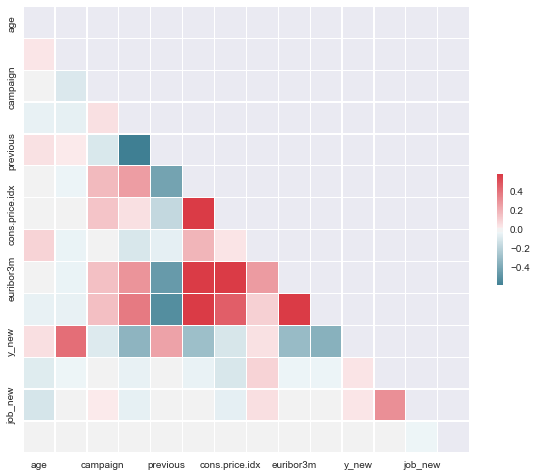

In [205]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.2,
            square=True, xticklabels=2, yticklabels=2,
            linewidths=.2, cbar_kws={"shrink": .2}, ax=ax)
corr
###Видим сильные отрицательные корреляции (обратные связи) между. 
### 1. previous и pdays
### 2. previous и euribor3m
### 3. previous и nr.employed
### 4. previous и emp.var.rate

###Видим сильные положительные корреляции (прямые связи) между.
###Тут ничего удивительного,потому что это все внешнеэкономические показатели
### 1. cons.price.idx и emp.var.rate
### 2. cons.price.idx и euribor3m
### 3. cons.price.idx и nr.employed

Axes(0.125,0.125;0.775x0.775)


y,no,yes
job,,
admin.,879,133
blue-collar,823,61
entrepreneur,140,8
housemaid,99,11
management,294,30
retired,128,38
self-employed,146,13
services,358,35
student,63,19


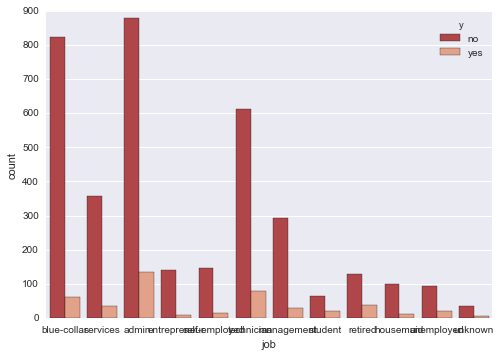

In [126]:
print(sns.countplot(x='job', hue='y', data=df))
pd.crosstab(df['job'],df['y'])
##Больше всего купивших подписку среди тех, кто занимает адинистративные должности##

Axes(0.125,0.125;0.775x0.775)


y,no,yes
marital,,
divorced,403,43
married,2257,252
single,998,155
unknown,10,1


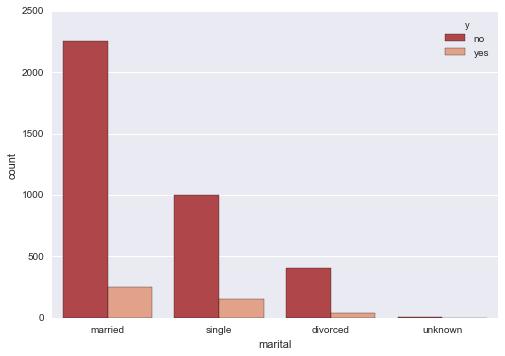

In [125]:
print(sns.countplot(x='marital', hue='y', data=df))
pd.crosstab(df['marital'],df['y'])
##Больше всего купивших подписку среди тех, кто женат##

Axes(0.125,0.125;0.775x0.775)


y,no,yes
education,,
basic.4y,391,38
basic.6y,211,17
basic.9y,531,43
high.school,824,97
illiterate,1,0
professional.course,470,65
university.degree,1099,165
unknown,141,26


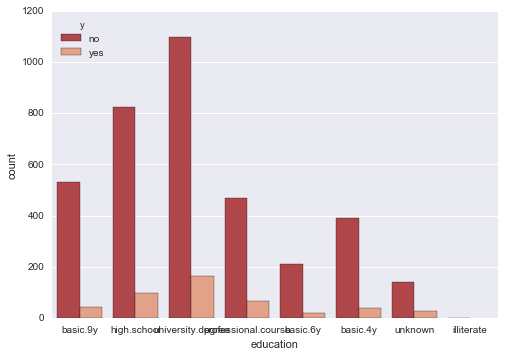

In [124]:
print(sns.countplot(x='education', hue='y', data=df))
pd.crosstab(df['education'],df['y'])
##Больше всего купивших подписку среди тех, кто закончил университет##

Axes(0.125,0.125;0.775x0.775)


y,no,yes
default,,
no,2913,402
unknown,754,49
yes,1,0


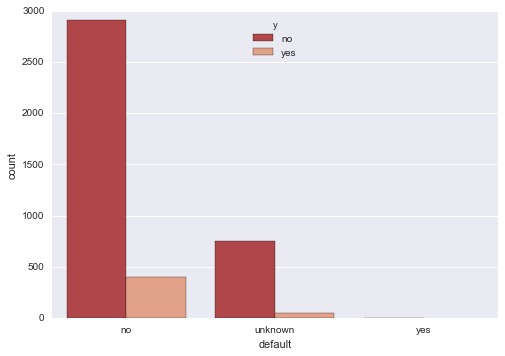

In [123]:
print(sns.countplot(x='default', hue='y', data=df))
pd.crosstab(df['default'],df['y'])
##Больше всего купивших подписку среди тех, кто не обладает кредитом по умолчанию##

Axes(0.125,0.125;0.775x0.775)


y,no,yes
housing,,
no,1637,202
unknown,96,9
yes,1935,240


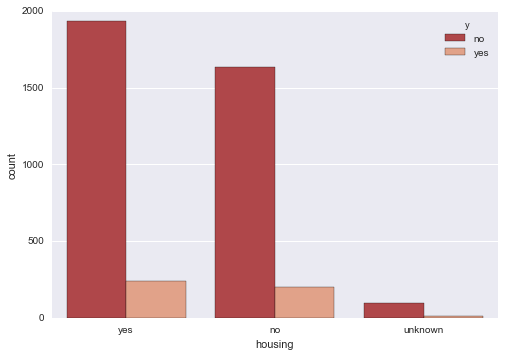

In [122]:
print(sns.countplot(x='housing', hue='y', data=df))
pd.crosstab(df['housing'],df['y'])
##Подписку одинаково купили те, кто брал и не брал жилищный кредит##

Axes(0.125,0.125;0.775x0.775)


y,no,yes
loan,,
no,2975,374
unknown,96,9
yes,597,68


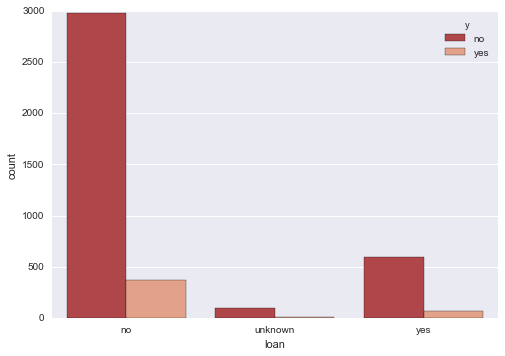

In [121]:
print(sns.countplot(x='loan', hue='y', data=df))
pd.crosstab(df['loan'],df['y'])
##Больше купивших подписку среди тех, кто не брал потребительский кредит##

Axes(0.125,0.125;0.775x0.775)


y,no,yes
contact,,
cellular,2277,375
telephone,1391,76


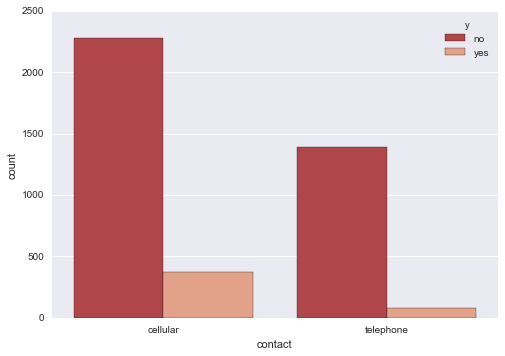

In [120]:
print(sns.countplot(x='contact', hue='y', data=df))
pd.crosstab(df['contact'],df['y'])
##Среди тех, с кем последний контакт был по мобильному, купиших подписку больше

Axes(0.125,0.125;0.775x0.775)


y,no,yes
month,,
apr,179,36
aug,572,64
dec,10,12
jul,652,59
jun,462,68
mar,20,28
may,1288,90
nov,403,43
oct,44,25


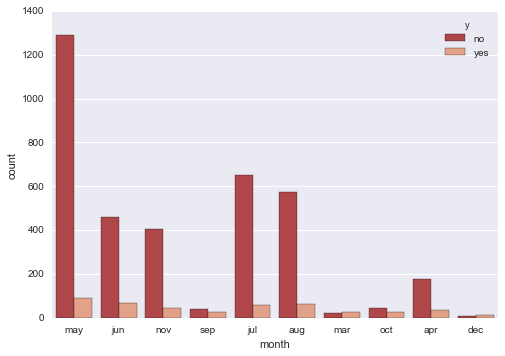

In [127]:
print(sns.countplot(x='month', hue='y', data=df))
pd.crosstab(df['month'],df['y'])
##В августе и июле подписок примерно столько же, сколько в мае, хотя в целом контактов в этом месяце существенно менше##

Axes(0.125,0.125;0.775x0.775)


y,no,yes
day_of_week,,
fri,685,83
mon,757,98
thu,764,96
tue,750,91
wed,712,83


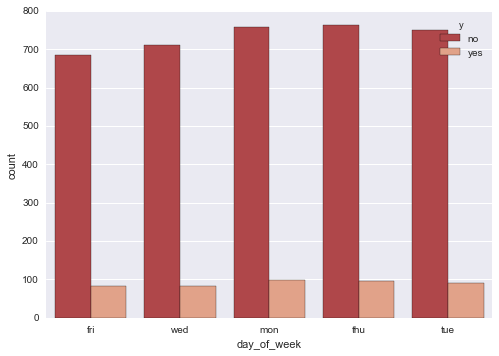

In [129]:
print(sns.countplot(x='day_of_week', hue='y', data=df))
pd.crosstab(df['day_of_week'],df['y'])
##По дням недели ничего интересного###

Axes(0.125,0.125;0.775x0.775)


y,no,yes
pdays_new,,
0,3608,351
1,60,100


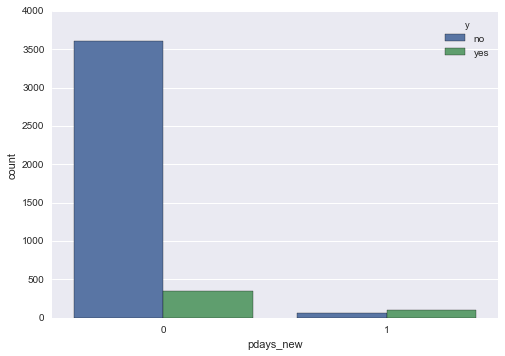

In [13]:
def pdays(p):
    if p == 999 :
        return 0
    else:
        return 1
df['pdays_new'] = df['pdays'].apply(pdays)

print(sns.countplot(x='pdays_new', hue='y', data=df))
pd.crosstab(df['pdays_new'],df['y'])
##Среди тех, к кому не обращались в другими спецпредложениями, купивши подписку больше##

In [207]:
##Проведем 
cell=df[df['contact']== 'cellular']['y_new']
tele=df[df['contact']== 'telephone']['y_new']
print(print("Тест для CONTACT:z-test предлагает нам отклонить нулевую гипотезу о равенстве долей" ))
print(proportions_diff_z_test(proportions_diff_z_stat_ind(cell,tele),alternative = 'greater'))

ly=df[df['loan']== 'yes']['y_new']
ln=df[df['loan']== 'no']['y_new']
print(print("Тест для LOAN:z-test предлагает нам принять нулевую гипотезу о равенстве долей" ))
print(proportions_diff_z_test(proportions_diff_z_stat_ind(ly,ln),alternative = 'greater'))

dy=df[df['default']== 'yes']['y_new']
dn=df[df['default']== 'no']['y_new']
print(print("Тест для DEFAULT:z-test предлагает нам принять нулевую гипотезу о равенстве долей" ))
print(proportions_diff_z_test(proportions_diff_z_stat_ind(dy,dn),alternative = 'greater'))

married=df[df['marital']== 'married']['y_new']
single=df[df['marital']== 'single']['y_new']
print(print("Тест для MARITAL:z-test предлагает нам принять нулевую гипотезу о равенстве долей" ))
print(proportions_diff_z_test(proportions_diff_z_stat_ind(married,single),alternative = 'greater'))


def uni(u):
    if u == 'university.degree':
        return 1
    else:
        return 0
df['education_new'] = df['education'].apply(uni)

university=df[df['education_new']== 1]['y_new']
education=df[df["education_new"]== 0]['y_new']
print(print("Тест для EDUCATION:z-test предлагает нам отклонить нулевую гипотезу о равенстве долей" ))
print(proportions_diff_z_test(proportions_diff_z_stat_ind(university,education),alternative = 'greater'))

def job(j):
    if j == 'admin.':
        return 1
    else:
        return 0
    
df['job_new'] = df['job'].apply(job)

admin=df[df['job_new']== 1]['y_new']
job=df[df["job_new"]== 0]['y_new']
print(print("Тест для JOB:z-test предлагает нам отклонить нулевую гипотезу о равенстве долей" ))
print(proportions_diff_z_test(proportions_diff_z_stat_ind(admin,job),alternative = 'greater'))

pdays=df[df['pdays_new']== 1]['y_new']
nopdays=df[df["pdays_new"]== 0]['y_new']
print(print("Тест для PDAYS:z-test предлагает нам отклонить нулевую гипотезу о равенстве долей" ))
print(proportions_diff_z_test(proportions_diff_z_stat_ind(pdays,nopdays),alternative = 'greater'))

Тест для CONTACT:z-test предлагает нам отклонить нулевую гипотезу о равенстве долей
None
0.0
Тест для LOAN:z-test предлагает нам принять нулевую гипотезу о равенстве долей
None
0.76077256103
Тест для DEFAULT:z-test предлагает нам принять нулевую гипотезу о равенстве долей
None
0.644859437092
Тест для MARITAL:z-test предлагает нам принять нулевую гипотезу о равенстве долей
None
0.998816385717
Тест для EDUCATION:z-test предлагает нам отклонить нулевую гипотезу о равенстве долей
None
0.00200013454682
Тест для JOB:z-test предлагает нам отклонить нулевую гипотезу о равенстве долей
None
0.00504885242371
Тест для PDAYS:z-test предлагает нам отклонить нулевую гипотезу о равенстве долей
None
0.0


**Подведем итоги первичного анализа**

*Портрет среднего клиента*:
40 лет, занимает административную должность, женат, закончил университет и взял в нашем банке ипотечны кредит. При этом кредитом по умолчанию он не обладает, потребительский кредит не оформлял.

*Типичный контакт*:
По мобильному телефону, длится примерно 4 минуты. Основная масса промо-звонков пришлась на май, однако не менее эффективными были звонки июля и августа. С большинством клиентов НЕ связывались в рамках других промо-компаний, с теми же, кому банк уже делал спец.предложение связывались в последний раз примерно 5 дней назад. Мы рассматриваем только последний контакт по компании, среднее число звонков в рамках которой около 2-3.

*Типичная макроэкономическая ситуация*:
Уровень изменения занятости очень невелик, меньше 1%, это значит клиенты находятся в стабильном с точки зрения занятости контексте. Индекс потребительской уверенности достаточно низок (около -40%), то есть мнения респондентов об общей экономической ситуации и личном материальном положении скорее соответствуют неуверенности ощущению неблагополучия. Индекс потребительских цен в среднем меньше 100%, то есть цены по сравнению с предыдущим периодом снизились.Европейская межбансковская ставка (на 3 месяца) примерно 3%, этот показатель относительно стабилен и едва ли оказывает существенное влияние на самочувствие клиента.

*Коррелционные связи*
Между собой коррелируют все макроэкономические показатели, однако в этом мало удивительного. Интересно, что с ними же коррелирует количество предыдущих контактов, это нужно будет дополнительно рассмотреть.

*Статистические тесты*

1) О значимости различий средних значений у купивших и не купивших подписку клиентов. 
Не подтвердилась только гипотеза о значимости разности распределений возраста. Однако! На таких больших выборках как наша в этом мало удивительного.

2) О значимости долей купивших и не купивших подписку в группах по номинальным признакам.
Интересно, что именно среди типичных по профилю клиентов, количество купивших подписку значимо больше. В целом, это тоже может быть объяснено размером выборки, однако примечательно,что администраторы с высших образованием и ипотечным кредитом, которым не звонили со спецпредложениями банка, и с которыми связались по мобильному с большей долей вероятности.